# New section

### Importing the libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3442 images belonging to 12 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 302 images belonging to 12 classes.


In [ ]:
training_set.class_indices

{'bus stop': 0,
 'cycling one way': 1,
 'fourwheller parking': 2,
 'go slow': 3,
 'no parking': 4,
 'probhited right': 5,
 'probhitited left': 6,
 'railway track': 7,
 'speed limit 60': 8,
 'two way traffic': 9,
 'twowhellerparking': 10,
 'zebra crossing': 11}

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=12, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
108/108 [==============================] - 1612s 15s/step - loss: 0.7921 - accuracy: 0.7644 - val_loss: 1.1981 - val_accuracy: 0.6159
Epoch 2/10
108/108 [==============================] - 142s 1s/step - loss: 0.2368 - accuracy: 0.9303 - val_loss: 1.7640 - val_accuracy: 0.5728
Epoch 3/10
108/108 [==============================] - 141s 1s/step - loss: 0.1869 - accuracy: 0.9428 - val_loss: 1.6032 - val_accuracy: 0.6126
Epoch 4/10
108/108 [==============================] - 141s 1s/step - loss: 0.1154 - accuracy: 0.9617 - val_loss: 1.6276 - val_accuracy: 0.6225
Epoch 5/10
108/108 [==============================] - 141s 1s/step - loss: 0.0870 - accuracy: 0.9753 - val_loss: 1.5130 - val_accuracy: 0.6523
Epoch 6/10
108/108 [==============================] - 141s 1s/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 2.1363 - val_accuracy: 0.6325
Epoch 7/10
108/108 [==============================] - 141s 1s/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 1.6530 - val_accuracy: 0.67

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Dataset/validation/IMG_20211205_185647_1 - Copy.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)
training_set.class_indices
print(result)
if result[0][0]:
      prediction = 'busstop'
elif result[0][1]:
      prediction = 'cycling one way'
elif result[0][2]:
      prediction = 'fourwheller parking'
elif result[0][3]:
      prediction = 'go slow'
elif result[0][4]:
      prediction = 'no parking'
elif result[0][5]:
      prediction = 'probhited right'
elif result[0][6]:
      prediction = 'probhitited left'
elif result[0][7]:
      prediction = 'railway track'
elif result[0][8]:
      prediction = 'speed limit 60'
elif result[0][9]:
        prediction = 'two way traffic'
elif result[0][10]:
        prediction = 'twowhellerparking'
elif result[0][11]:
        prediction = 'zebra crossing'

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.2901996e-17]]


In [ ]:
print(prediction)

go slow


In [ ]:
# # serialize model to JSON
# model_json = cnn.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# cnn.save_weights("model.h5")
# print("Saved model to disk")




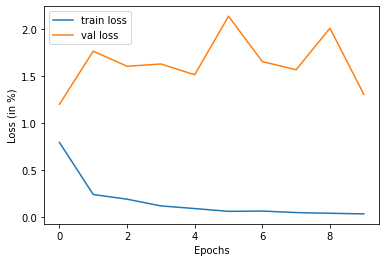

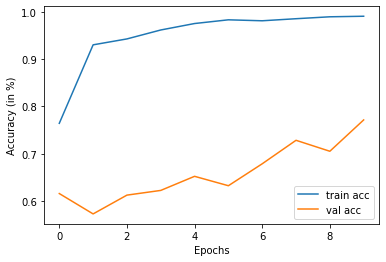

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (in %)')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in %)')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3